In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import scipy as scipy

In [ ]:
f= lambda x: x**2

In [ ]:
x= np.linspace(0,4,10)
x

array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
       2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ])

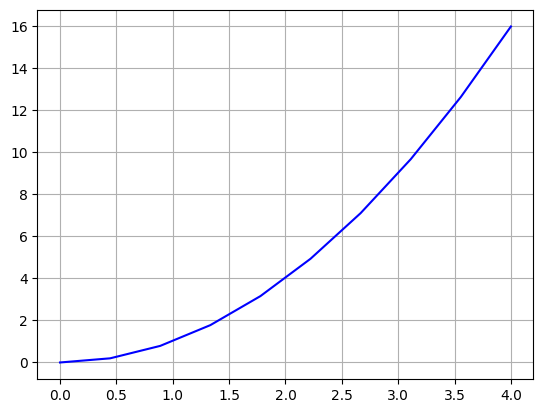

In [ ]:
plt.plot(x,f(x),c="b")
plt.grid()

In [ ]:
f(x)

array([ 0.        ,  0.19753086,  0.79012346,  1.77777778,  3.16049383,
        4.9382716 ,  7.11111111,  9.67901235, 12.64197531, 16.        ])

# **Método del trapecio**

In [ ]:
# Prueba de como funciona

A=0

for i in range(len(x)-1):
  a= x[i+1]
  b= x[i]
  A+=abs((b-a)/2*(f(a)+f(b)))
print(A)

21.46502057613169


In [ ]:
# Comprobación

x = np.linspace(0, 4,10)
y = x**2
scipy.integrate.trapezoid(y, x)

21.46502057613169

In [ ]:
# Se define una f y se da un intervalo específico ( método propio )

def trapezoide(f,x):
  A=0
  for i in range (len(x)-1):
    a= x[i+1]
    b= x[i]
    A+=abs((b-a)/2*(f(a)+f(b)))
  return A

In [ ]:
trapezoide(f,x)

21.46502057613169

In [ ]:
def trapecio_general(f,x):
  sumatoria=0

  for i in range (1,len(x)-1):
    sumatoria+= f(x[i])
    for j in range(len(x)):
      h= x[j]-x[j-1]
  A= h/2*(f(min(x))+f(max(x))+2*sumatoria)
  return A

In [ ]:
trapecio_general(f,x)

21.465020576131693

# **Generalización**

In [ ]:
def integral_trapz(f,a,b,N):

  x= np.linspace (a,b,int(N))
  h=(b-a)/N
  A= ( f(x[0]) + f(x[-1]) + 2*f(x[1:-1]).sum())*h*0.5
  return A

In [ ]:
integral= integral_trapz(f,0,4,N=10)
integral

19.318518518518516

In [ ]:
N= np.linspace(100,10000,10)
areas= np.zeros(len(N))

for i, n_ in enumerate(N):
  areas[i]= integral_trapz(f,0,1,n_)

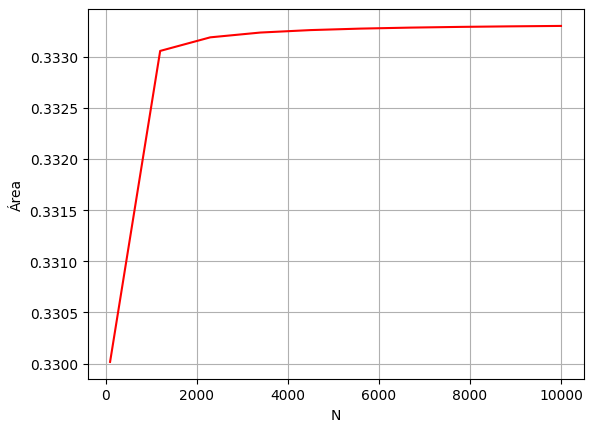

In [ ]:
plt.plot(N,areas,c="r")
plt.xlabel("N")
plt.ylabel("Área")
plt.grid()

# **Error del método**

In [ ]:
g= lambda t: ((t-1)**2/3*np.sin(t))+1

In [ ]:
t_= np.linspace(0,2,100)

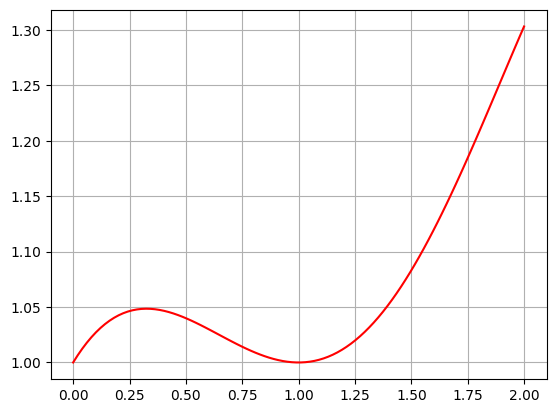

In [ ]:
plt.plot(t_,g(t_),c="r")
plt.grid()

In [ ]:
trapecio_general(g,t)

2.1341539024386145

In [ ]:
# comprobación inicial

scipy.integrate.trapezoid(g(t_), t_)

2.1341539024386242

In [ ]:
t= sp.symbols("t")
funcion= (((t-1)**2)/3*sp.sin(t))+1

In [ ]:
primera=sp.diff(funcion)
primera

(t - 1)**2*cos(t)/3 + (2*t - 2)*sin(t)/3

In [ ]:
sp.diff(primera) # segunda derivada de la función

-(t - 1)**2*sin(t)/3 + 2*(2*t - 2)*cos(t)/3 + 2*sin(t)/3

In [ ]:
# interpolar para hallar el máximo entre (0,2)

def s_derivada(t):
  return -(-(t-1)**2*np.sin(t)/3+2*(2*t-2)*np.cos(t)/3+2*np.sin(t)/3)  # invertir la función

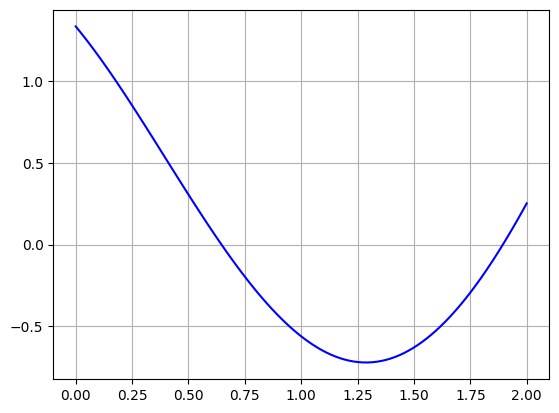

In [ ]:
plt.plot(t_,s_derivada(t_),c="b")
plt.grid()

In [ ]:
maximo= scipy.optimize.fmin_powell(s_derivada,0.1)
maximo # el valor de epsilon

Optimization terminated successfully.
         Current function value: -0.720789
         Iterations: 2
         Function evaluations: 20


array([1.28731699])

In [ ]:
e= 12E-3 # por el método del trapecio

In [ ]:
n= np.sqrt(abs((2)**3/e*s_derivada(maximo)))
n # error del método

array([21.92090641])

In [ ]:
# comprobación 2

integral_trapz(g,0,2,N=n) # reduce mucho el valor

array([1.94723856])

In [ ]:
# comprobación 3

scipy.integrate.trapezoid(g(t_), t_,dx=n)

2.1341539024386242

In [ ]:
integral_trapz(g,0,2,N=n)

array([1.94723856])

# **Regla de simpson**

In [16]:
def funcion(x):
  return x**2

In [17]:
x=np.linspace(0,4,100)

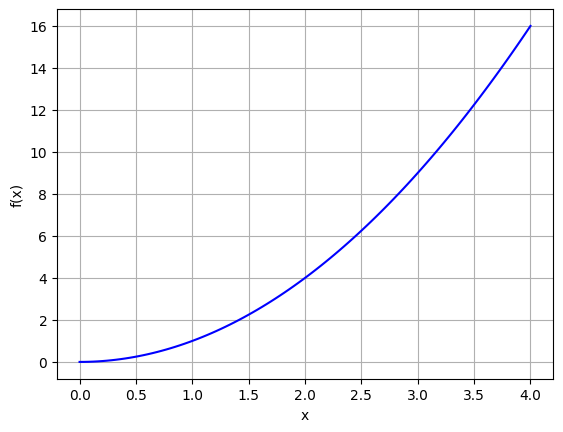

In [25]:
plt.plot(x,funcion(x),c="b")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

In [19]:
# Códgio vectorizado

def simpson_c(a,b,N):

  x= np.linspace(a,b,N)
  a= x[0]
  b= x[-1]
  h= (b-a)/N

  s1= x[2:N-2:2] # términos a recorrer
  s2= x[1:N-1:2]

  e= (h/3*(funcion(a)+ 2*funcion(s1).sum() + 4*funcion(s2).sum() + funcion(b))).sum()

  return e


In [20]:
simpson_c(0,1,10000) # converge lentamente

0.3332000166676667

In [23]:
# Comprobación
x_= np.linspace(0,1,1000)
scipy.integrate.simpson(funcion(x_), x_)

0.3333333333333333

# **Programa generalizado**

In [105]:
import sys

In [111]:
# integral.py

def integral_trapz(f,a,b,N):

  x= np.linspace (a,b,int(N))
  h=(b-a)/N
  A= ( f(x[0]) + f(x[-1]) + 2*f(x[1:-1]).sum())*h*0.5
  return A

In [82]:
if __name__=="__main__":
  if len(sys.argv)!=5:
    print("EROR: parámetros incorrectos")
    print("Modo de uso")
    print(f"{sys.executable} {sys.argv[0]} f a b N ")
    print("Ejemplo")
    print(f"{sys.executable}{sys.argv[0]} x**2 1 3 100")
    exit(1)

  else:
    try:
      n1= sys.argv[1]
    except ValueError:
      print("EROR: el párametro no es una funcion")
      exit(1)
    try:
      n2=int(sys.argv[1])
      n3=int(sys.argv[2])
      n4= int(sys.argv[3])
    except ValueError:
      print("ERROR: los parámetros no son números")
      exit(1)

    print(f"El valor de integral es {integral_trapz(f,a,b,N)}")
    exit(0)

EROR: parámetros incorrectos
Modo de uso
/usr/bin/python3 /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py f a b N 
Ejemplo
/usr/bin/python3/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py x**2 1 3 100


In [113]:
print("Nombre del programa:", sys.argv[0])
print("Numero de elementos:", len(sys.argv))
print("Lista de argumentos:", str(sys.argv))
print("Numero de elementos excluyendo el programa:", (len(sys.argv) - 1))

Nombre del programa: /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py
Numero de elementos: 3
Lista de argumentos: ['/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-ea318d82-a2d4-467c-ac3d-9ef4ab3f65a0.json']
Numero de elementos excluyendo el programa: 2


In [89]:
f= lambda x: x**2+1

In [91]:
integral_trapz(f,1,5,10)

40.91851851851851

In [39]:
h= lambda x: np.cos(x*np.exp(x))

In [40]:
I= simpson_c(0.1,np.inf,10)

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
